In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv("Datos_HT.csv",sep=';')
data1.head(5)
data = data1.sample(300)
adata = data

In [ ]:
data.count(axis = 0) 

MatchId                  300
Home midfield            300
Away midfield            300
Home Right Defence       300
Away Right Defence       300
Home Central Defence     300
Away Central Defence     300
Home Left Defence        300
Away Left Defence        300
Home Right Attack        300
Away Right Attack        300
Home Central Attack      300
Away Central Attack      300
Home Left Attack         300
Away Left Attack         300
Home Indirect Defence    300
Away Indirect Defence    300
Home Indirect Attack     300
Away Indirect Attack     300
Home Attitude            300
Away Attitude            300
Home Tactic              300
Away Tactic              300
Home Tactic Level        300
Away Tactic Level        300
Home Goals               300
Away Goals               300
dtype: int64

In [ ]:
data.dtypes

MatchId                    int64
Home midfield            float64
Away midfield            float64
Home Right Defence       float64
Away Right Defence       float64
Home Central Defence     float64
Away Central Defence     float64
Home Left Defence        float64
Away Left Defence        float64
Home Right Attack        float64
Away Right Attack        float64
Home Central Attack      float64
Away Central Attack      float64
Home Left Attack         float64
Away Left Attack         float64
Home Indirect Defence    float64
Away Indirect Defence    float64
Home Indirect Attack     float64
Away Indirect Attack     float64
Home Attitude             object
Away Attitude             object
Home Tactic               object
Away Tactic               object
Home Tactic Level         object
Away Tactic Level         object
Home Goals               float64
Away Goals               float64
dtype: object

In [ ]:
f1 = "Home midfield"
f2 = "Away midfield"

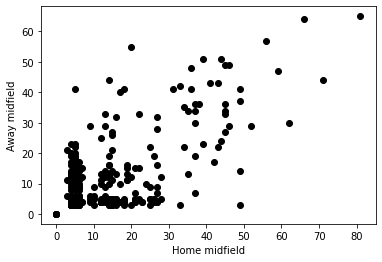

In [ ]:
X = data[[f1,f2]]
#Visualise data points
plt.scatter(X[f1],X[f2],c='black')
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()

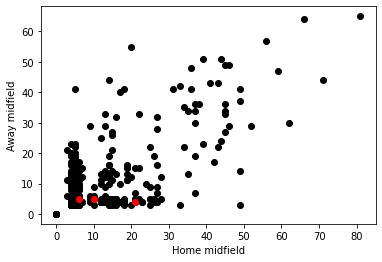

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X[f1],X[f2],c='black')
plt.scatter(Centroids[f1],Centroids[f2],c='red')
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()


In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c[f1]-row_d[f1])**2
            d2=(row_c[f2]-row_d[f2])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[[f1,f2]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new[f1] - Centroids[f1]).sum() + (Centroids_new[f2] - Centroids[f2]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[[f1,f2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


19.66040058686508
9.081515042594049
1.0064813688892054
0.05224133703824929
0.0


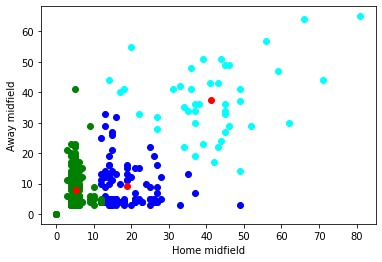

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data[f1],data[f2],c=color[k])
plt.scatter(Centroids[f1],Centroids[f2],c='red')
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
df1 = adata[['Home midfield', 'Away midfield']]
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1)

array([2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2])

In [ ]:
df1.head()
df1.count()

Home midfield    300
Away midfield    300
dtype: int64

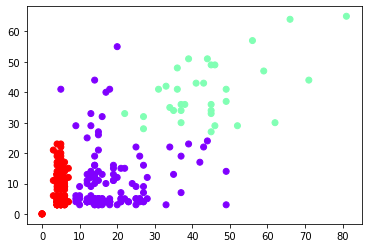

In [ ]:
plt.scatter(df1['Home midfield'],df1['Away midfield'], c=cluster.labels_, cmap='rainbow')